# PROJECT : Breast Cancer Preprocessing Analysis

`WORK IN PROGRESS`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data


link - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29

Wisconsin Diagnostic Breast Cancer (WDBC) - 
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

disription -
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

In [2]:
datasetUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
    'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error',
    'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius',
    'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension'
]

target = ['diagnosis']
headers = target +features


In [3]:
df = pd.read_csv(datasetUrl, header=None)
df = df.loc[:,1:]
df.columns = headers

df.head(3)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
df.shape

(569, 31)

## Exploratory Data Analysis

In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Diagnosis (M = malignant, B = benign)

In [6]:
df.describe().T[['50%','mean','std','min','max']]

,50%,mean,std,min,max
mean radius,13.370000,14.127292,3.524049,6.981000,28.11000
mean texture,18.840000,19.289649,4.301036,9.710000,39.28000
mean perimeter,86.240000,91.969033,24.298981,43.790000,188.50000
mean area,551.100000,654.889104,351.914129,143.500000,2501.00000
mean smoothness,0.095870,0.096360,0.014064,0.052630,0.16340
mean compactness,0.092630,0.104341,0.052813,0.019380,0.34540
mean concavity,0.061540,0.088799,0.079720,0.000000,0.42680
mean concave points,0.033500,0.048919,0.038803,0.000000,0.20120
mean symmetry,0.179200,0.181162,0.027414,0.106000,0.30400
mean fractal dimension,0.061540,0.062798,0.007060,0.049960,0.09744


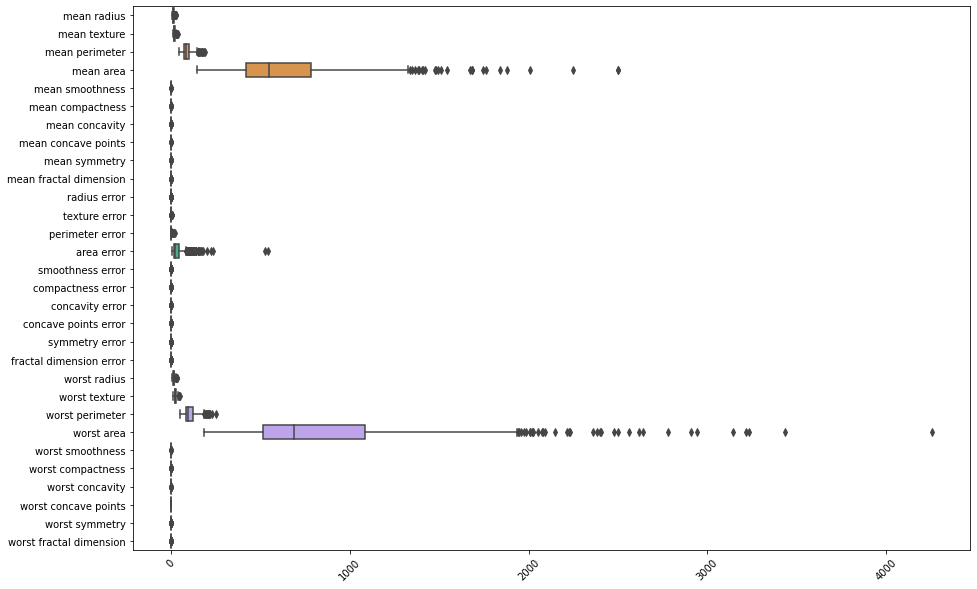

In [75]:
fig, ax=plt.subplots(1,1, figsize=(15,10))
sns.boxplot(data=df, ax=ax, orient='horizontal')
plt.xticks(rotation=45)
plt.show()

- mean perimeter
- mean area, 
- area error, 
- worst perimeter, 
- worst area 

are not on same scale as other features, they have to be standardized. 

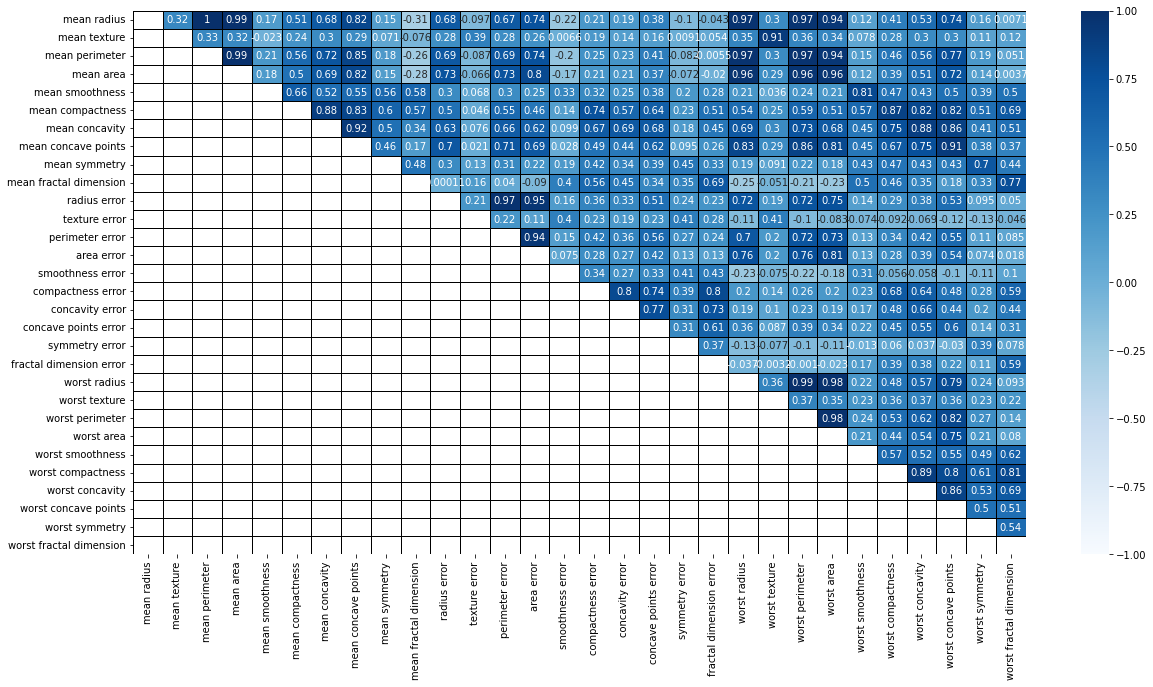

In [8]:
fig, ax=plt.subplots(1,1, figsize=(20,10))
corr_matrix = df.corr()
mask = np.tril(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, cmap='Blues', ax=ax, linecolor='black', \
    linewidths=1, annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

A lot of correlation. And it is understandable as they have relation like radius-area, radius-perimeter etc. 
lets try reducing dimensions with PCA and then check whether the correlation between features still exist.

In [9]:
n_labels = len(df.columns)
n_labels

31

In [10]:
n_cols = 4
n_rows = int(np.ceil(n_labels / n_cols)) 

(n_rows, n_cols)

(8, 4)

No handles with labels found to put in legend.


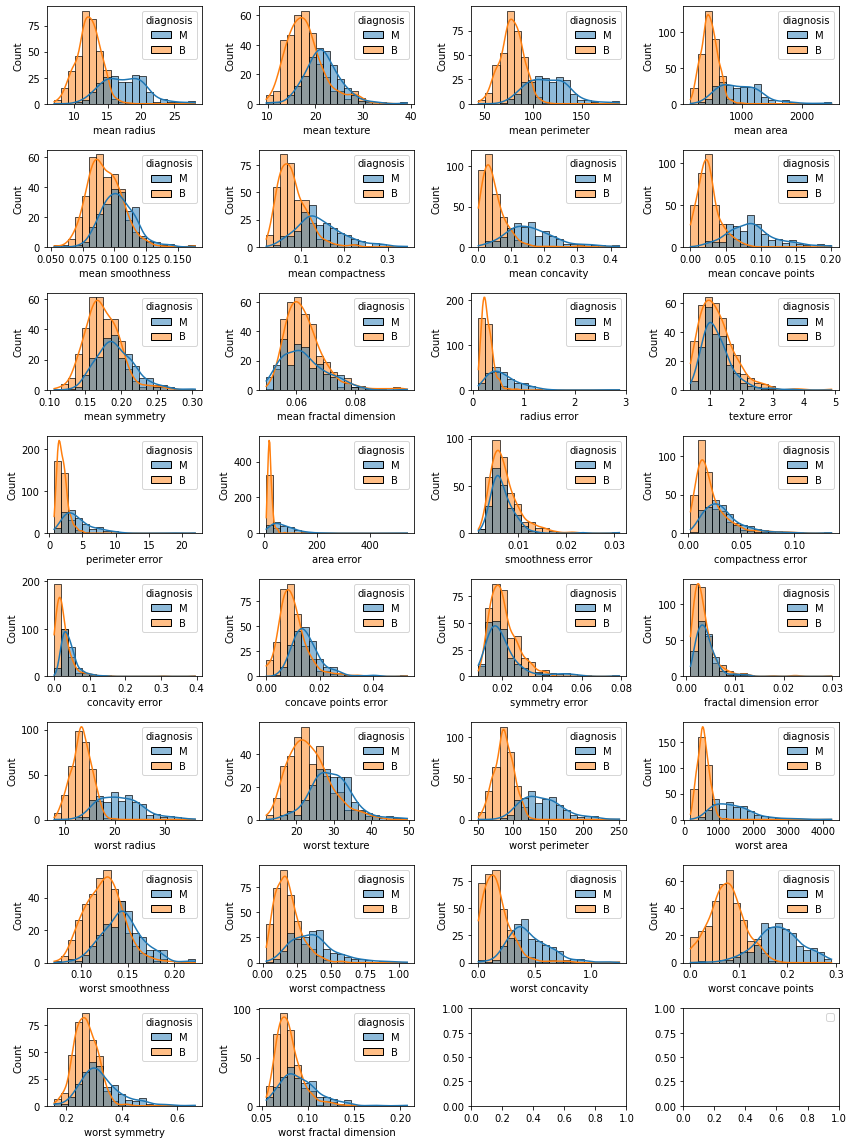

In [73]:
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(n_cols*3, n_rows*2))
ax = ax.reshape((n_rows*n_cols))
for idx,name in enumerate(features):
    sns.histplot(x=df[name], bins=20, hue=df[target[0]], label=name, ax=ax[idx], kde=True)

plt.legend()
plt.tight_layout()
plt.show()


## Preprocessing 


In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
scaled_df = pd.DataFrame(RobustScaler().fit_transform(
    df[features].values), columns=features)
scaled_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


No handles with labels found to put in legend.


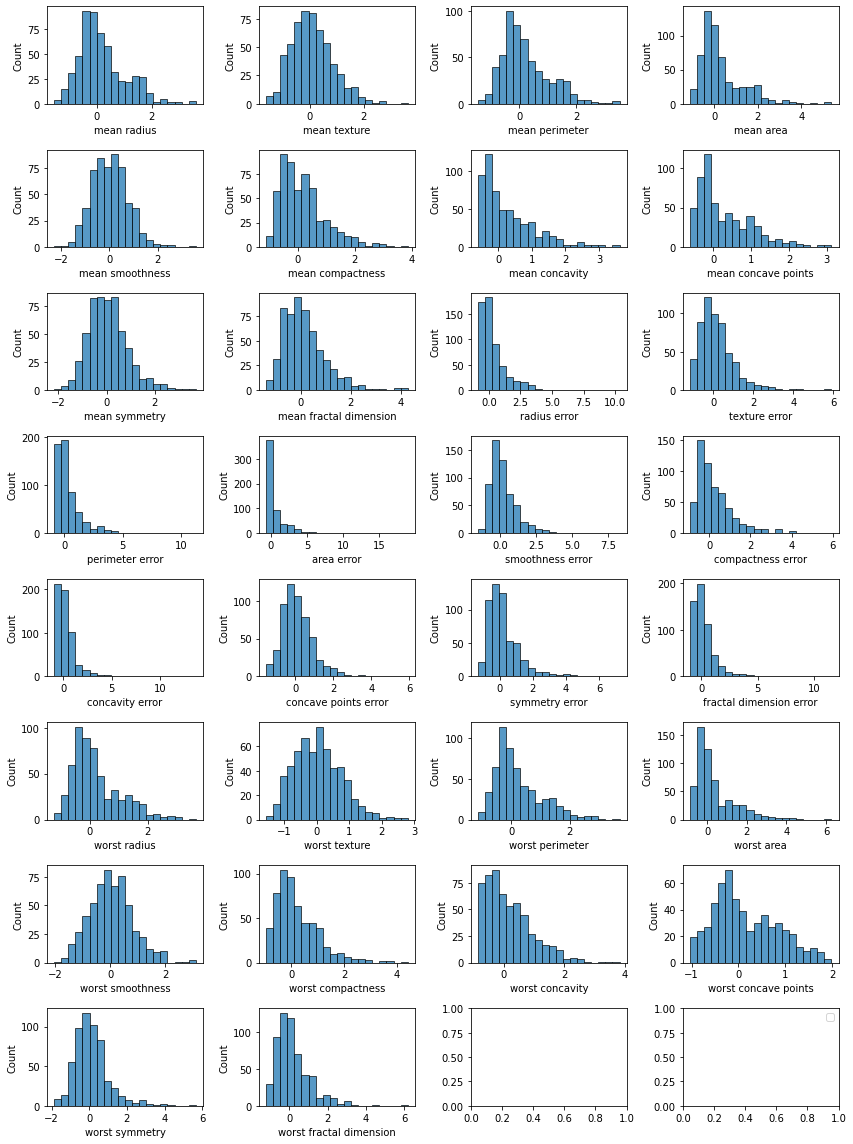

In [14]:
n_labels = len(scaled_df.columns)
n_cols = 4
n_rows = int(np.ceil(n_labels / n_cols))

fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows,
                       figsize=(n_cols*3, n_rows*2))
ax = ax.reshape((n_rows*n_cols))
for idx, name in enumerate(scaled_df.columns):
    sns.histplot(scaled_df[name], bins=20, label=name, ax=ax[idx])

plt.legend()
plt.tight_layout()
plt.show()

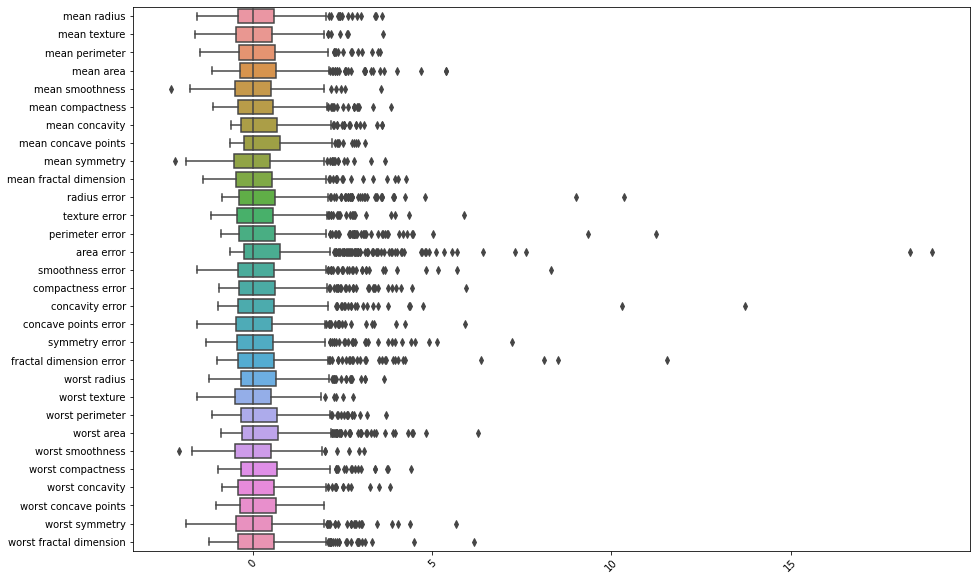

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.boxplot(data=scaled_df, ax=ax, orient='horizontal')
plt.xticks(rotation=45)
plt.show()

In [16]:
from sklearn.decomposition import PCA

In [17]:
p_components = PCA(n_components=10).fit_transform(scaled_df)

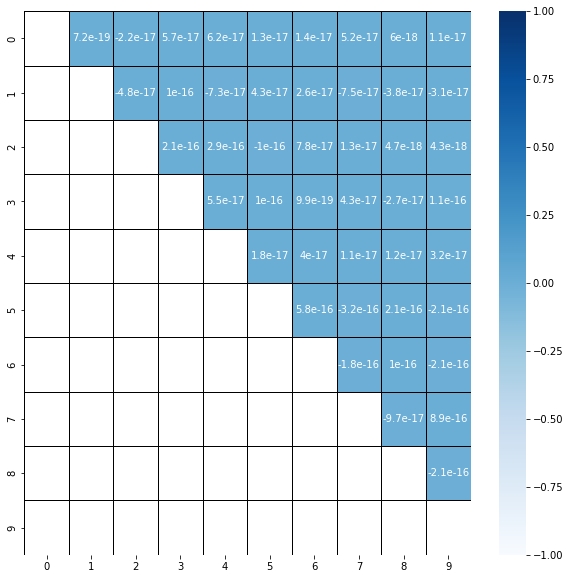

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
corr_matrix = pd.DataFrame(p_components).corr()
mask = np.tril(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, cmap='Blues', ax=ax, linecolor='black', linewidths=1, annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

## Model Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target[0]], \
    random_state=0, stratify=df[target[0]], test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### distance based : Logistic Regression Classification Report

In [29]:
lr_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=10)),
    ('logistic regresssion', LogisticRegression(penalty='l2'))
])
lr_pipe.fit(x_train, y_train)


Pipeline(steps=[('scaler', RobustScaler()), ('pca', PCA(n_components=10)),
                ('logistic regresssion', LogisticRegression())])

In [30]:
y_train_pred = lr_pipe.predict(x_train)
y_test_pred = lr_pipe.predict(x_test)

#### Training Report

In [31]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.99      1.00      0.99       285
           M       0.99      0.98      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



#### Testing Report

In [32]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97        72
           M       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### distance based : Support Vector Classification Report

In [33]:
svc_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=10)),
    ('svc', SVC())
])
svc_pipe.fit(x_train, y_train)


Pipeline(steps=[('scaler', RobustScaler()), ('pca', PCA(n_components=10)),
                ('svc', SVC())])

In [34]:
y_train_pred = svc_pipe.predict(x_train)
y_test_pred = svc_pipe.predict(x_test)

#### Training Report

In [35]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       0.99      0.97      0.98       170

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



#### Testing Report

In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.96        72
           M       0.91      0.95      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



### distance based : KNN Classification Report

In [37]:
knn_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=10)),
    ('K Neighbors Classifier', KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2))
])
knn_pipe.fit(x_train, y_train)


Pipeline(steps=[('scaler', RobustScaler()), ('pca', PCA(n_components=10)),
                ('K Neighbors Classifier',
                 KNeighborsClassifier(n_neighbors=10))])

In [38]:
y_train_pred = knn_pipe.predict(x_train)
y_test_pred = knn_pipe.predict(x_test)

#### Training Report

In [39]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.95      1.00      0.97       285
           M       1.00      0.91      0.95       170

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.97      0.96      0.96       455



#### Testing Report

In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           B       0.97      0.93      0.95        72
           M       0.89      0.95      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



### tree based : Random Forest Classification Report

In [53]:
rf_pipe = Pipeline([
    ('pca', PCA(n_components=10)),
    ('Random Forest Classifier', RandomForestClassifier(bootstrap=True, n_estimators=300, \
        max_features=3, min_samples_leaf=3, max_depth=5))
])
rf_pipe.fit(x_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('Random Forest Classifier',
                 RandomForestClassifier(max_depth=5, max_features=3,
                                        min_samples_leaf=3,
                                        n_estimators=300))])

In [54]:
y_train_pred = rf_pipe.predict(x_train)
y_test_pred = rf_pipe.predict(x_test)

#### Training Report

In [55]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       250
           M       0.99      0.95      0.97       148

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398



#### Testing Report

In [56]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           B       0.95      0.98      0.96       107
           M       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



### tree based : Gradient Boosting Classification Report

In [57]:
gb_pipe = Pipeline([
    ('pca', PCA(n_components=10)),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=500,\
         learning_rate=0.1, max_depth= 5))
])
gb_pipe.fit(x_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('Gradient Boosting Classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=500))])

In [58]:
y_train_pred = gb_pipe.predict(x_train)
y_test_pred = gb_pipe.predict(x_test)

#### Training Report

In [59]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       250
           M       1.00      1.00      1.00       148

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



#### Testing Report

In [60]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           B       0.96      0.95      0.96       107
           M       0.92      0.94      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

